In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [2]:
import numpy as np
import pandas as pd
import datetime as dt

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)
session = Session(engine)
 # View all of the classes that automap found
print(Base.classes.keys())

['station', 'measurement']


In [6]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station 

In [12]:
# Find the most recent date in the data set.

session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

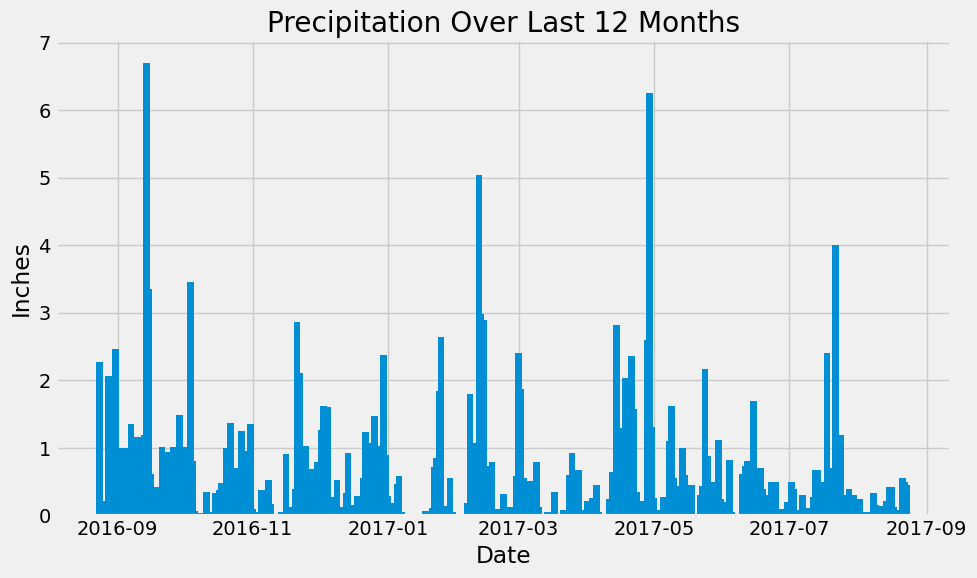

In [22]:


# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data

most_recent_date_str = "2017-08-23"
most_recent_date = dt.datetime.strptime(most_recent_date_str, '%Y-%m-%d')

# Calculate the date 1 year ago from the most recent date in the dataset
last_twelve_months_date = most_recent_date - dt.timedelta(days=365)

# Query to retrieve the last 12 months of precipitation data
precipitation_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= last_twelve_months_date).\
    filter(Measurement.date <= most_recent_date).all()

# Create a DataFrame from the query results
precipitation_df = pd.DataFrame(precipitation_data, columns=['Date', 'Precipitation'])

# Convert the date column to datetime
precipitation_df['Date'] = pd.to_datetime(precipitation_df['Date'])

# Set the Date column as the DataFrame index
precipitation_df.set_index('Date', inplace=True)

# Sort the DataFrame by date
precipitation_df.sort_index(inplace=True)

# Plot the precipitation data
plt.figure(figsize=(10, 6))
plt.bar(precipitation_df.index, precipitation_df['Precipitation'], width=3)
plt.title('Precipitation Over Last 12 Months')
plt.xlabel('Date')
plt.ylabel('Inches')
plt.tight_layout()
plt.show()

In [23]:
# Use describe() method to calculate summary statistics
summary_statistics = precipitation_df['Precipitation'].describe()
summary_statistics

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64

In [11]:
#Design a query to calculate the total number of stations in the dataset.
station_results = session.query(func.count(Station.station)).scalar()
print(station_results)  

9


In [16]:
# Query to calculate observation counts for each station and order them in descending order
station_counts = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

# Print the list of stations and their observation counts
print("Station ID  |  Observation Count")
print("-----------------------------")
for station, count in station_counts:
    print(f"{station}  |  {count}")

# Find the most active station (station with the highest observation count)
most_active_station = station_counts[0][0]  # Extract the station ID of the most active station
print(f"\nThe most active station is {most_active_station} with {station_counts[0][1]} observations.")

Station ID  |  Observation Count
-----------------------------
USC00519281  |  2772
USC00519397  |  2724
USC00513117  |  2709
USC00519523  |  2669
USC00516128  |  2612
USC00514830  |  2202
USC00511918  |  1979
USC00517948  |  1372
USC00518838  |  511

The most active station is USC00519281 with 2772 observations.


In [17]:
# Define the most active station ID
most_active_station = "USC00519281"

# Query to retrieve the minimum, maximum, and average temperatures for the most active station
temperature_stats = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active_station).all()

min_temp, max_temp, avg_temp = temperature_stats[0]

# Print the temperature statistics
print(f"Temperature Statistics for Station {most_active_station}:")
print(f"Minimum Temperature: {min_temp} °F")
print(f"Maximum Temperature: {max_temp} °F")
print(f"Average Temperature: {avg_temp:.2f} °F")

Temperature Statistics for Station USC00519281:
Minimum Temperature: 54.0 °F
Maximum Temperature: 85.0 °F
Average Temperature: 71.66 °F


In [19]:
# Query to retrieve the previous 12 months of TOBS data for the most active station
most_active_station = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).first()[0]

# Calculate the date 1 year ago from the most recent date in the dataset
most_recent_date_str = session.query(func.max(Measurement.date)).scalar()
most_recent_date = dt.datetime.strptime(most_recent_date_str, '%Y-%m-%d')
one_year_ago = most_recent_date - dt.timedelta(days=365)
tobs_data = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == most_active_station).\
    filter(Measurement.date >= one_year_ago).\
    filter(Measurement.date <= most_recent_date).all()

# Create a DataFrame from the query results
tobs_df = pd.DataFrame(tobs_data, columns=['Date', 'Temperature'])

# Print the TOBS data for the most active station
print(f"Temperature Observation (TOBS) Data for Station {most_active_station} in the Last 12 Months:")
print(tobs_df)

Temperature Observation (TOBS) Data for Station USC00519281 in the Last 12 Months:
           Date  Temperature
0    2016-08-24         77.0
1    2016-08-25         80.0
2    2016-08-26         80.0
3    2016-08-27         75.0
4    2016-08-28         73.0
..          ...          ...
346  2017-08-14         77.0
347  2017-08-15         77.0
348  2017-08-16         76.0
349  2017-08-17         76.0
350  2017-08-18         79.0

[351 rows x 2 columns]


In [20]:
tobs_df = pd.DataFrame(tobs_data, columns=['Date', 'Temperature'])

# Print the TOBS data for the most active station
print(f"Temperature Observation (TOBS) Data for Station {most_active_station} in the Last 12 Months:")
print(tobs_df)

Temperature Observation (TOBS) Data for Station USC00519281 in the Last 12 Months:
           Date  Temperature
0    2016-08-24         77.0
1    2016-08-25         80.0
2    2016-08-26         80.0
3    2016-08-27         75.0
4    2016-08-28         73.0
..          ...          ...
346  2017-08-14         77.0
347  2017-08-15         77.0
348  2017-08-16         76.0
349  2017-08-17         76.0
350  2017-08-18         79.0

[351 rows x 2 columns]


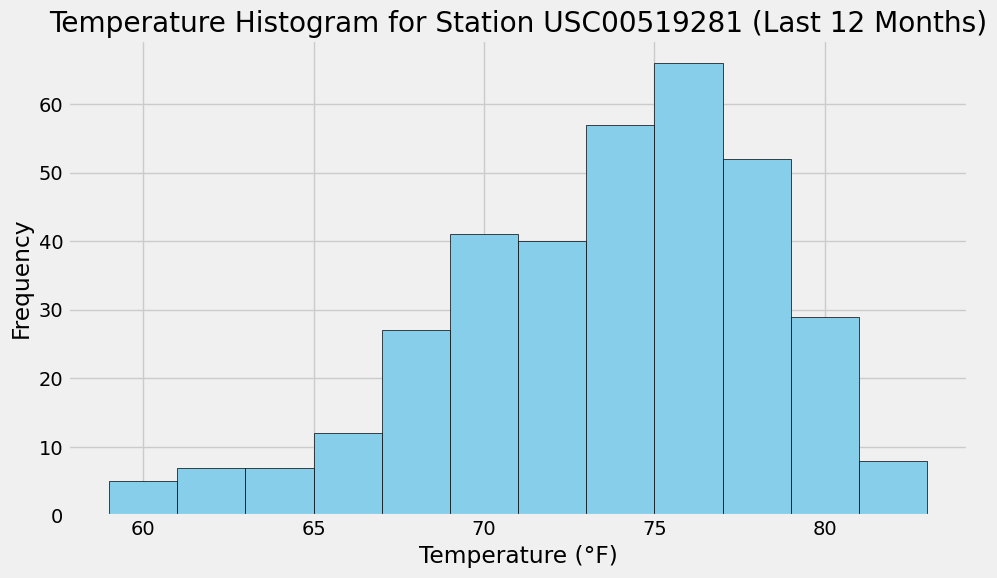

In [21]:
# Plotting a histogram with bins=12 for TOBS data
plt.figure(figsize=(10, 6))
plt.hist(tobs_df['Temperature'], bins=12, color='skyblue', edgecolor='black')

plt.title(f'Temperature Histogram for Station {most_active_station} (Last 12 Months)')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()

plt.show()

In [ ]:
# Close Session
session.close()